In [73]:
import yfinance as yf

msft = yf.download(tickers='MSFT', period='300d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [16]:
msft.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-10,214.500000,216.500000,209.720001,211.009995,211.009995,44045100
2020-11-11,212.389999,218.039993,212.199997,216.550003,216.550003,29440800
2020-11-12,217.210007,219.110001,214.460007,215.440002,215.440002,21593900
2020-11-13,216.360001,217.419998,214.160004,216.509995,216.509995,18621100
2020-11-16,214.869995,217.740005,214.520004,217.229996,217.229996,24921400


In [2]:
import numpy as np
from matplotlib import pyplot as plt

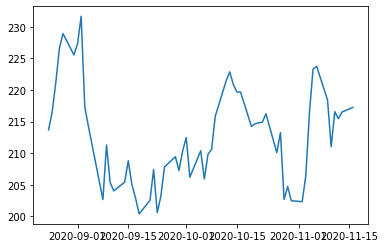

In [4]:
plt.plot(msft['Close'])

Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))

The default setting is 9 periods and can be adjusted. On a daily chart, this line is the midpoint of the 9-day high-low range, 
which is almost two weeks.  

In [52]:
# data in numpy format
def tenkan_sen(data_high, data_low, period = 9, fill_empty = True):
    tenkan = []
    if fill_empty:
        tenkan = [None] * period
        tenkan = tenkan + [(max(data_high[i-period:i]) + min(data_low[i-period:i])) / 2 for i in range(period,len(data_high))]
    else:
        tenkan = [(max(data_high[i-period:i]) + min(data_low[i-period:i])) / 2 for i in range(period,len(data_high))]
    
    return np.array(tenkan)

Kijun-sen

Kijun-sen (基準線) calculation: (highest high + lowest low)/2 for the past 26 periods.

This is a confirmation line, a support/resistance line, and can be used as a trailing stop line. The Kijun Sen acts as an indicator of future price movement. If the price is higher than the blue line, it could continue to climb higher. If the price is below the blue line, it could keep dropping.

In [57]:
def kijun_sen(data_high, data_low, fill_empty = True, period=26):
    return tenkan_sen(data_high, data_low, period, fill_empty)

Senkou (先行) span A calculation: (Tenkan-sen + kijun-sen)/2 plotted 26 periods ahead.

Also called leading span 1, this line forms one edge of the kumo or cloud.

If the price is above the Senkou span, the top line serves as the first support level while the bottom line serves as the second support level.

If the price is below the Senkou span, the bottom line forms the first resistance level while the top line is the second resistance level. 

In [107]:
def span_a(data_high, data_low, period = 26, tenkan_period = 9, kijun_period = 26):
    tenkan = tenkan_sen(data_high, data_low, period = tenkan_period, fill_empty = False)
    kijun = kijun_sen(data_high, data_low, period = kijun_period, fill_empty = False)
    a = (tenkan[kijun_period - tenkan_period:] + kijun) / 2
    # shift
    a = np.insert(a, 0, [None] * (period + kijun_period))
    return a

Senkou span B calculation: (highest high + lowest low)/2 calculated over the past 52 time periods and plotted 26 periods ahead.

Also called leading span 2, this line forms the other edge of the Kumo. 

In [108]:
def span_b(data_high, data_low, period = 52):
    b = tenkan_sen(data_high, data_low, period = period, fill_empty=False)
    # shift
    shift = 26
    b = np.insert(b, 0, [None]*(period + shift))
    return b

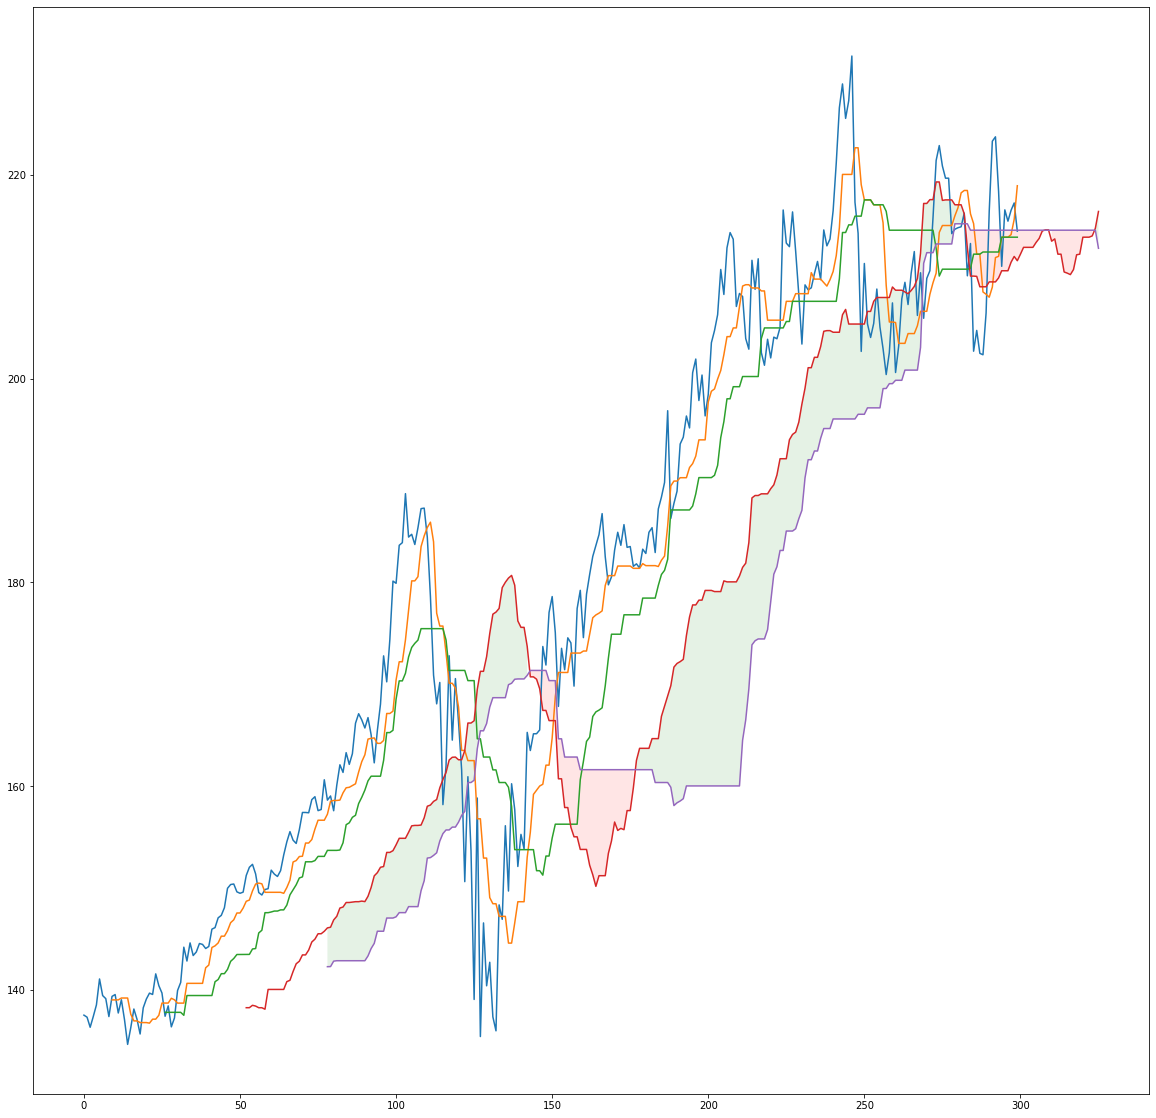

In [113]:
high = msft['High'].to_numpy()
low  = msft['Low'].to_numpy()
close = msft['Close'].to_numpy()

shift = 26

plt.figure(figsize=(20,20))
tenkan_line = tenkan_sen(high, low)
kijun_line = kijun_sen(high, low)
span_a_line = span_a(high, low)
span_b_line = span_b(high, low)
plt.plot(close)
plt.plot(tenkan_line)
plt.plot(kijun_line)
plt.plot(span_a_line)
plt.plot(span_b_line)
# kumo
plt.fill_between([c for c in range(len(close) + shift)],span_a_line, span_b_line, where = span_b_line > span_a_line, facecolor='red', alpha = 0.1)
plt.fill_between([c for c in range(len(close) + shift)],span_a_line, span_b_line, where = span_b_line < span_a_line, facecolor='green', alpha = 0.1)
plt.show()